In [1]:
import numpy as np
from brain import Brain
from preferred_path import PreferredPath
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Setup

In [2]:
sc = np.array(
    [[ 0, 5, 0, 0, 0, 0, 0, 0],
     [ 5, 0, 4, 0, 0, 9, 0, 0],
     [ 0, 4, 0, 0, 0, 1, 7, 0],
     [ 0, 0, 0, 0, 2, 6, 7, 0],
     [ 0, 0, 0, 2, 0, 3, 0, 0],
     [ 0, 9, 1, 6, 3, 0, 0, 0],
     [ 0, 0, 7, 7, 0, 0, 0, 0],
     [ 0, 0, 0, 0, 0, 0, 0, 0]])

In [3]:
fc = np.array(
    [[ 0,  0,  1,  0, -2,  0,  2,  0],
     [ 0,  0, -2, -1,  0,  0, -4,  0],
     [ 1, -2,  0, -2,  0, -1, 17,  2],
     [ 0, -1, -2,  0,  1, -1,  1, -2],
     [-2,  0,  0,  1,  0,  6, -1,  2],
     [ 0,  0, -1, -1,  6,  0,  5, 13],
     [ 2, -4, 17,  1, -1,  5,  0, 11],
     [ 0,  0,  2, -2,  2, 13, 11,  0]])

In [4]:
euc_dist = np.array(
    [[ 0, 31, 63, 34, 29, 39, 76, 32],
     [31,  0, 60, 30, 26, 38, 83, 45],
     [63, 60,  0, 64, 62, 67, 96, 67],
     [34, 30, 64,  0, 29, 38, 69, 46],
     [29, 26, 62, 29,  0, 33, 82, 40],
     [39, 38, 67, 38, 33,  0, 77, 46],
     [76, 83, 96, 69, 82, 77,  0, 76],
     [32, 45, 67, 46, 40, 46, 76,  0]])

In [5]:
brain = Brain(sc, fc, euc_dist, 1, 1)

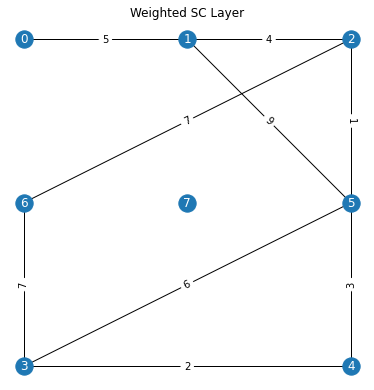

In [6]:
G = nx.from_numpy_array(brain.sc * brain.sc_bin)
plt.figure(figsize=(5,5))
pos = {0:(0,2),1:(1,2),2:(2,2),3:(0,0),4:(2,0),5:(2,1),6:(0,1),7:(1,1)}
nx.draw(G, pos=pos, with_labels=True, font_color='white')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("Weighted SC Layer")
plt.show()

# Preferred paths

In [7]:
node_str = brain.node_strength(weighted=False)
streamlines = brain.streamlines()

fn_vector = [
    lambda s, t, prev: streamlines[s, t],
    lambda s, t, prev: node_str[t]]
fn_weights = [0.4, 0.7]

In [8]:
pp = PreferredPath(brain.sc_bin, fn_vector, fn_weights)

In [9]:
pp.retrieve_all_paths('fwd')

{0: {1: [0, 1],
  2: [0, 1, 5, 3, 6, 2],
  3: [0, 1, 5, 3],
  4: None,
  5: [0, 1, 5],
  6: [0, 1, 5, 3, 6],
  7: None},
 1: {2: [1, 5, 3, 6, 2],
  3: [1, 5, 3],
  4: None,
  5: [1, 5],
  6: [1, 5, 3, 6],
  7: None},
 2: {3: None, 4: None, 5: [2, 5], 6: None, 7: None},
 3: {4: None, 5: [3, 5], 6: [3, 5, 1, 2, 6], 7: None},
 4: {5: [4, 5], 6: [4, 5, 1, 2, 6], 7: None},
 5: {6: [5, 1, 2, 6], 7: None},
 6: {7: None}}

In [10]:
pp.retrieve_single_path(1, 3, 'fwd')

[1, 5, 3]